# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import re

## Let's 'Gather' and Load in our Datasets

- The first dataset ```twitter-archive-enhanced.csv``` was made available for download in the classroom.
- The second dataset is downloaded using the request library
- The third tataset has already been scraped and downloaded into a `tweet_json.txt` file. see `twitter_api.ipynb`

In [2]:
# Let's read in the first dataset as 'dogs'
dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# The second dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Write to file
file = 'image_predictions.tsv'
with open(file, 'wb') as f:
    f.write(response.content)

In [4]:
# Now let's read it in as 'image_predictions'
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# The third dataset
with open('tweet_json.txt', 'r') as f:
    like_tweets = []
    for line in f.readlines():
        tweet_like = json.loads(line)
        like_tweets.append(tweet_like)

In [6]:
# We can read it in as 'sentiment'. We require just the 'id', 'retweet_count' and 'favorite_count' columns
sentiment = pd.DataFrame(like_tweets, columns=['id', 'retweet_count', 'favorite_count'])

## Access the Dataset

#### Let's see the dogs table

In [7]:
dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
sum(dogs.duplicated())

0

In [10]:
# let's see the null 'expanded_urls' rows
dogs.loc[dogs.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


After visual assessment I obeserved a lot of 'None' values and the odd name 'a' which is a consequence of a mismatch with regular expression.

Let's see just how many are present:

In [11]:
display(dogs.query(f'name == "None"').shape)
display(dogs.query(f'name == "a"').shape)

# Other inaccurate values exist in the name column

(745, 17)

(55, 17)

#### Let's see the image_predictions table

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
sum(image_predictions.duplicated())

0

#### Let's see the sentiment table

In [15]:
sentiment

,id,retweet_count,favorite_count
0,892420643555336193,6969,33692
1,892177421306343426,5272,29219
2,891815181378084864,3464,21973
3,891689557279858688,7191,36781
4,891327558926688256,7715,35177
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [16]:
sum(sentiment.duplicated())

0

In [17]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Quality
#### `dog table`
- `timestamp` should be in datetime format
- There are only 78 non-null values in `in_reply_to_status_id` and `in_reply_to_user_id` columns. I'll drop these columns
- There are only 181 non-null values in the columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. I'll also drop these columns
- Missing values (None) in `name` column
- Inaccurate values exist in `name` column
- Missing values in `expanded_urls` columns


#### `image_predictions table`
- Inconsistent case in `prediction` columns (some uppercase, others lowercase)
- Underscore used to seperate words in `prediction` columns, where whitespace is more appropriate

#### `sentiment table`

### Tidiness
- dog stages in the `dogs` table should be a single column
- all three tables should be a single table as they all represent a single observational unit

## Clean the Dataset

### Define
- convert `timestamp` in the `dogs` table to datetime data type
- create new column `stage` in `dogs` table to replace redundant stages columns
- drop the columns [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] in `dogs` table
- use regular expression patterns to extract dog name from the `text` column in the `dogs` table
- append `tweet_id` to base url inplace of `expanded_urls` column in the `dogs` table
- capitalise predicted dog specie in `image_predictions` table
- replace underscore with space in predictions in `image_prediction` table
- merge all three tables into one

### Code

In [18]:
# first create a copy of that are going to be cleaned

dogs_clean = dogs.copy()
image_predictions_clean = image_predictions.copy()

In [19]:
# convert timestamp in the dogs table to datetime data type

dogs_clean.timestamp = pd.to_datetime(dogs_clean.timestamp)

In [20]:
# create new column stage in dogs table to replace redundant stages columns

def stage(df):
    stage_names = ['doggo', 'floofer', 'pupper', 'puppo']
    stage_df = np.repeat('Nonenone', df.shape[0])         # I use Nonenone as started because np.repeat truncates
    for idx, col in enumerate(df.columns):                # all inputs larger than starter to starter length.
        dog_stage = np.where(df[col].values != 'None')    # I'll fix this later
        stage_df[dog_stage] = stage_names[idx]
    return stage_df
    
dogs_clean['stage'] = stage(dogs_clean[['doggo', 'floofer', 'pupper', 'puppo']])

# let's drop the redundant type columns
dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# now to fix the Nonenone issue hilighted above
dogs_clean.stage.replace('Nonenone', 'None', inplace=True)

In [21]:
# drop the columns [in_reply_to_status_id,
#                   in_reply_to_user_id,
#                   retweeted_status_id,
#                   retweeted_status_user_id,
#                   retweeted_status_timestamp] in dogs table

dogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                 'retweeted_status_timestamp'], axis=1, inplace=True)

In [22]:
# use regular expression patterns to extract dog name from the text column in the dogs table

def extract(text):
    # I'll compile the various patterns first and append the pattern objects into a list
    patterns = []
    patterns.append(re.compile(r"[Tt]his is ([A-Z]\w+)"))
    patterns.append(re.compile(r"named ([A-Z]\w+)"))
    patterns.append(re.compile(r"[Mm]eet ([A-Z]\w+)"))
    patterns.append(re.compile(r"[Hh]is name is ([A-Z]\w+)"))
    patterns.append(re.compile(r"[Hh]er name is ([A-Z]\w+)"))
    patterns.append(re.compile(r"[Ss]ay hello to ([A-Z]\w+)"))
    patterns.append(re.compile(r"[Hh]ere is ([A-Z]\w+)"))
    patterns.append(re.compile(r"[Tt]his lil pup is ([A-Z]\w+)"))
    patterns.append(re.compile(r"[Tt]hese two dogs are ([A-Z]\w+)"))
    patterns.append(re.compile(r"that ([A-Z]\w+)"))
    patterns.append(re.compile(r"([A-Z]\w+) has"))
    patterns.append(re.compile(r"([A-Z]\w+) here\s"))
    
    # Common words frequently caught by my regex patterns I'd like to avoid
    black_list = ['He', 'he', 'She', 'she', 'a', 'Anyway', 'the', 'no']
    
    for pattern in patterns:
        match = pattern.search(text)
        if match:
            if match.group(1) not in black_list:
                return match.group(1)
    
    # If after going through all the defined patterns a match is not found, then return None
    return "None"

dogs_clean.name = dogs_clean.text.apply(extract)

In [23]:
# append tweet_id to base url inplace of expanded_urls column in dog table

base_url = dogs_clean.loc[0, 'expanded_urls'].split('/')
prefix = ('/').join(base_url[:-3])
suffix = ('/').join(base_url[-2:])

dogs_clean.expanded_urls = prefix + '/' + dogs_clean.tweet_id.astype('str') + '/' + suffix[1]

In [24]:
# capitalise species predictions in image_predictions table

image_predictions_clean.p1 = image_predictions_clean.p1.str.capitalize()
image_predictions_clean.p2 = image_predictions_clean.p2.str.capitalize()
image_predictions_clean.p3 = image_predictions_clean.p3.str.capitalize()

In [25]:
# replace underscore with space in predictions in image_prediction table

image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_', ' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_', ' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_', ' ')

In [26]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
# merge all three tables into one

first_hurdle = pd.merge(left=dogs_clean, right=image_predictions_clean, on='tweet_id', how='left')
merged_df = pd.merge(left=first_hurdle, right=sentiment, left_on='tweet_id', right_on='id', how='left')

# we can drop the 'id' column from sentiment in the merged column as it is redundant
merged_df.drop(['id'], axis=1, inplace=True)

### Test

In [28]:
# Let's check for the columns we dropped and the columns we compressed too
dogs_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [29]:
# let's check to be sure there are no more missing values
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   stage               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 165.8+ KB


In [30]:
# We're bound to have None values, but if our RegEx worked correctly, 'a' shouldn't exist as a dog name
display(dogs_clean.query(f'name == "None"').shape)
display(dogs_clean.query(f'name == "a"').shape)

(805, 9)

(0, 9)

In [31]:
dogs_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [32]:
# make sure predictions are capitalized consistently
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
# let's see our merged dataframe's information

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   stage               2356 non-null   object             
 9   jpg_url             2075 non-null   object             
 10  img_num             2075 non-null   float64            
 11  p1                  2075 non-null   object             
 12  p1_conf             2075 non-null 

We observe missing values because about three hundred (300) observations captured in the `twitter-archive-enhanced.csv` dataset (dogs table) are not captured in the `image_predicions.tsv` dataset. Not much can be done about that. Also, some tweet_id's don't seem to exist in the archives anymore hence the incomplete retweet and favorite counts.

In [34]:
# let's visualise the dataset

merged_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6969.0,33692.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5272.0,29219.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3464.0,21973.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,7191.0,36781.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7715.0,35177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,36.0,88.0
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,115.0,246.0
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,36.0,100.0
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,39.0,112.0


## Storage

In [35]:
# We'll save our merged dataset as a csv file 'twitter_archive_master.csv'
merged_df.to_csv('twitter_archive_master.csv', index=False)

# Analysis

### Questions
- Which was the most engaged tweet
- What time of the day were tweets posted more to the #WeRateDogs twitter archive
- Which Dog stage recieve the highest rating

In [36]:
# let's reload in our merged dataframe
master = pd.read_csv('twitter_archive_master.csv')

In [37]:
master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6969.0,33692.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5272.0,29219.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3464.0,21973.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,7191.0,36781.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7715.0,35177.0


In [38]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2356 non-null   object 
 5   rating_numerator    2356 non-null   int64  
 6   rating_denominator  2356 non-null   int64  
 7   name                2356 non-null   object 
 8   stage               2356 non-null   object 
 9   jpg_url             2075 non-null   object 
 10  img_num             2075 non-null   float64
 11  p1                  2075 non-null   object 
 12  p1_conf             2075 non-null   float64
 13  p1_dog              2075 non-null   object 
 14  p2                  2075 non-null   object 
 15  p2_conf             2075 non-null   float64
 16  p2_dog

In [39]:
master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.356000e+03,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2327.000000,2327.000000
mean,7.427716e+17,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,2458.659218,7025.912763
std,6.856705e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,4163.665493,10918.663954
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,6.783989e+17,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,492.500000,1220.500000
50%,7.196279e+17,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1144.000000,3037.000000
75%,7.993373e+17,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,2844.500000,8563.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70330.000000,144244.000000


In [40]:
# Let's see the most engaged tweet by number of retweets

retweets = master.retweet_count.max()
master.query(f'retweet_count == {retweets}')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1039,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True,70330.0,144244.0


In [41]:
# Let's see the most engaged tweet by number of likes

favorites = master.favorite_count.max()
view = master.query(f'favorite_count == {favorites}')
view

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1039,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True,70330.0,144244.0


In [42]:
# Let's see the predicted dog kind

view[['p1', 'p1_conf']]

,p1,p1_conf
1039,Labrador retriever,0.825333


#### Insight
 
The most engaged tweet by both `favorite_count` and `retweet_count` is tweet with id '744234799360020481'. It happens to to be a 'Labrador retriever doggo'.

In [43]:
master.timestamp = pd.to_datetime(master.timestamp)

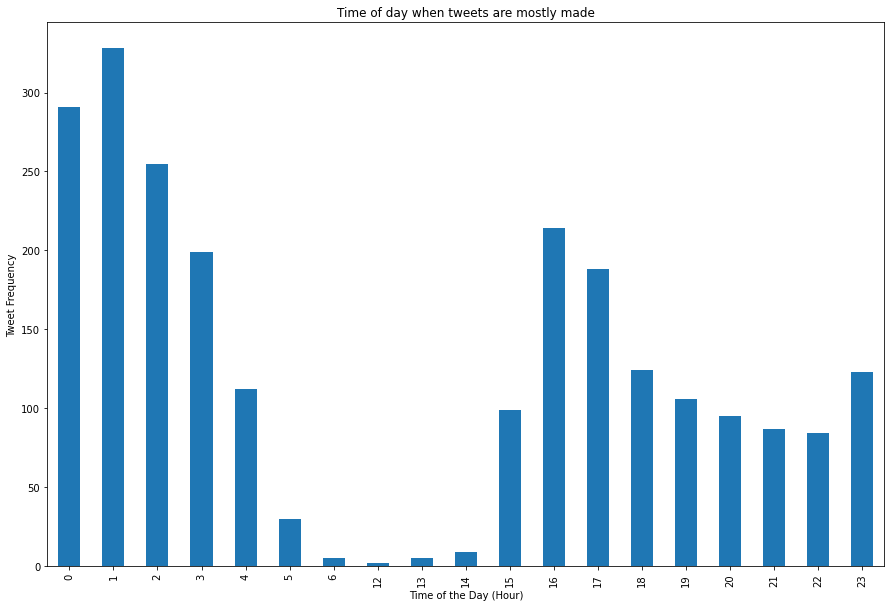

In [44]:
tweet_time = master.timestamp.dt.hour.value_counts()
index = tweet_time.index.sort_values()
tweet_time[index].plot(kind='bar', figsize=(15, 10))
plt.xlabel('Time of the Day (Hour)')
plt.ylabel('Tweet Frequency')
plt.title('Time of day when tweets are mostly made')
plt.show()

#### Insight
We see that tweets were posted to the #WeRateDogs archives mostly at midnight

['doggo', 'floofer', 'pupper', 'puppo']

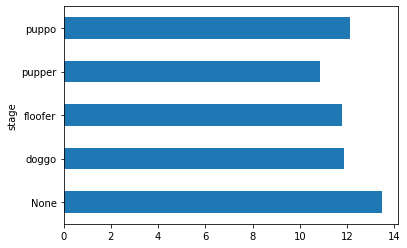

In [45]:
master.groupby('stage')['rating_numerator'].mean().plot(kind='barh')
['doggo', 'floofer', 'pupper', 'puppo']

#### Insight
Dogs in the puppo stage generally recieve higher ratings

## Conclusions

- The most engaged tweet by both favorite_count and retweet_count is tweet with id '744234799360020481'. It happens to to be a 'Labrador retriever doggo'.
- We see that tweets were posted to the #WeRateDogs archives mostly at midnight
- Dogs in the puppo stage generally recieve higher ratings